# Refined Stratified Sampling Example 1

- Author: Mohit S. Chauhan 
- Date: Aug 5, 2018

In this example, Stratified sampling is used to generate samples from Uniform probability distribution and sample are added using adaptive approach Refined Stratified Sampling.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS and RSS class from UQpy.

In [1]:
from UQpy.SampleMethods import STS
from UQpy.SampleMethods import RSS
from UQpy.Distributions import Uniform
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


Create a distribution object.

In [2]:
marginals = [Uniform(loc=0., scale=1.), Uniform(loc=0., scale=1.)]


Run stratified sampling.

In [3]:
x = STS(dist_object=marginals, sts_design=[4, 4], random_state=1)

Using UQpy RSS class to expand samples generated by STS class. In this example, two new samples are generated using rectangular stratification .

In [4]:
y = RSS(sample_object=x, nsamples=18, n_add=2, random_state=2)

In the first figure shown below, samples generated from STS class are plotted. Second figure, shows the new stratification corresponding to two generated samples using RSS class.

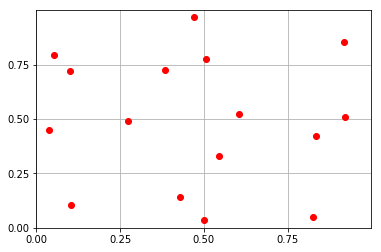

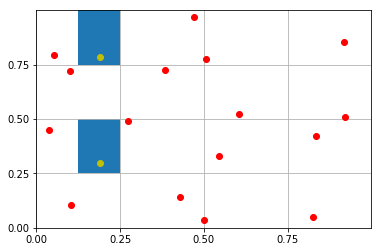

In [5]:
fig1 = plt.figure()
plt.plot(x.samples[:16, 0], x.samples[:16, 1], 'ro')
ax = fig1.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.show()

fig2 = plt.figure()
ax = fig2.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(y.sample_object.samples[:16, 0], y.sample_object.samples[:16, 1], 'ro')
plt.plot(y.sample_object.samples[16:, 0], y.sample_object.samples[16:, 1], 'yo')
for i in range(16, 18):
    rect1 = patches.Rectangle(y.sample_object.strata.origins[i], y.sample_object.strata.widths[i, 0], y.sample_object.strata.widths[i, 1])
    ax.add_patch(rect1)
plt.grid()
plt.show()

Further, RSS class is used to adaptively increase the sample size. In this example, samples are added in strata with maximum weights associated with it and strata's are cut randomly along the maximum width.

In [6]:
y.run(nsamples=100)

In the figure shown below, all samples generated from STS and RSS class are plotted.

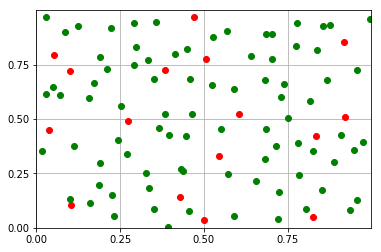

In [7]:
fig3 = plt.figure()
ax = fig3.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(y.sample_object.samples[:16, 0], y.sample_object.samples[:16, 1], 'ro')
plt.plot(y.sample_object.samples[16:, 0], y.sample_object.samples[16:, 1], 'go')
plt.grid()
plt.show()
